In [16]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D , MaxPool2D, Flatten, Dense

from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
def getdata(folder):
    classes = ["butterfly", "kangaroo", "Leopards"]
    data = []

    for k in range(3):
        for i in os.listdir(f"./Group_16/{folder}/{classes[k]}"):
            if i.endswith(".jpg"):
                image = Image.open(f"./Group_16/{folder}/{classes[k]}/{i}")
                img = image.resize((224,224))
                img = np.asarray(img)
                label = np.array([0, 0, 0])
                label[k] = 1
                img = np.array([img, label])
                data.append(img)
	
    random.shuffle(data)
    return np.array(data)

In [3]:
train = getdata("train")
val = getdata("val")
test = getdata("test")

/var/folders/mr/j9pl3fs55y146y5rj0_hzjzwl256tc/T/ipykernel_29794/841262762.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img = np.array([img, label])


In [4]:
def extract(data):
    xtrain = []
    ytrain = []
    for i in range(len(data)):
        if(len(data[i][0].shape)==3):
            xtrain.append(data[i][0])
            ytrain.append(data[i][1])

    return np.array(xtrain), np.array(ytrain)

In [5]:
xtrain, ytrain = extract(train)
xval, yval = extract(val)
xtest, ytest = extract(test)

In [7]:
model = Sequential([
	Conv2D(32,3,padding="valid", activation="relu", input_shape=(224,224,3), strides=1, kernel_initializer="he_normal"),
	Conv2D(64,3,padding="valid", activation="relu", strides=1, kernel_initializer="he_normal"),
	MaxPool2D(pool_size=(2, 2), strides=1, padding="valid"),
	Flatten(),
	Dense(128, activation='relu'),
	Dense(3, activation='softmax')
])

2022-05-14 15:55:15.704698: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=1)
out = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=20, callbacks=[es])

Epoch 1/20
5/5 [==============================] - 56s 11s/step - loss: 399824.2188 - accuracy: 0.3288 - val_loss: 86727.8438 - val_accuracy: 0.3667
Epoch 2/20
5/5 [==============================] - 35s 7s/step - loss: 77188.9531 - accuracy: 0.3425 - val_loss: 76091.3281 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 24s 5s/step - loss: 43133.6094 - accuracy: 0.3767 - val_loss: 16052.3955 - val_accuracy: 0.4333
Epoch 4/20
5/5 [==============================] - 25s 5s/step - loss: 7587.9419 - accuracy: 0.5685 - val_loss: 5994.6411 - val_accuracy: 0.7667
Epoch 5/20
5/5 [==============================] - 25s 5s/step - loss: 661.1312 - accuracy: 0.8699 - val_loss: 5001.8916 - val_accuracy: 0.5667
Epoch 6/20
5/5 [==============================] - 24s 5s/step - loss: 325.1558 - accuracy: 0.8973 - val_loss: 2823.3752 - val_accuracy: 0.6000
Epoch 7/20
5/5 [==============================] - 25s 5s/step - loss: 77.2825 - accuracy: 0.9521 - val_loss: 1957.5731 - val_accur

In [12]:
trainpred = model.predict(xtest)
trainpred = np.rint(trainpred)
print("Test Accuracy:", accuracy_score(ytest, trainpred))

Test Accuracy: 0.864406779661017


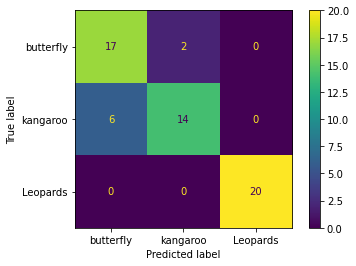

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ["butterfly", "kangaroo", "Leopards"]
disp = ConfusionMatrixDisplay(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(trainpred, axis=1)), display_labels=classes)
disp.plot()
plt.show()

In [14]:
img = Image.open(f"./Group_16/train/butterfly/image_0001.jpg")
img = img.resize((224,224))
butterfly = np.asarray(img)

img = Image.open(f"./Group_16/train/kangaroo/image_0002.jpg")
img = img.resize((224,224))
kangaroo = np.asarray(img)

img = Image.open(f"./Group_16/train/Leopards/image_0004.jpg")
img = img.resize((224,224))
leopard = np.asarray(img)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 219, 219, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3069504)           0         
                                                                 
 dense (Dense)               (None, 128)               392896640 
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [50]:
new_model = Model(inputs = model.input, outputs = model.layers[0].output)

In [18]:
def find5(arr):
    out = []
    a = arr.copy()

    for i in range(5):
        gg = np.unravel_index(np.argmax(a), a.shape)
        out.append(gg[1:])
        a[gg[0]][gg[1]][gg[2]][gg[3]] = 0
    
    return out

In [76]:
output = new_model.predict(np.array([kangaroo]))

In [29]:
max5 = find5(output)
max5

[(199, 151, 52), (134, 82, 49), (198, 151, 52), (177, 62, 49), (156, 69, 49)]

In [23]:
def patches(img, max):
    maxim = np.array([[[255] * 3 for i in range(224)] for i in range(224)], dtype="uint8")

    for neuron in max:
        I = neuron[0]
        J = neuron[1]

        for i in range(I-2, I+2):
            for j in range(J-2, J+2):
                maxim[i][j] = img[i][j]
    
    return maxim

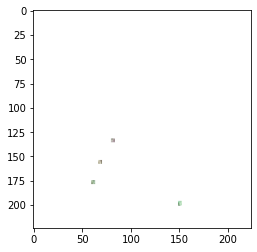

In [75]:
plt.imshow(patches(kangaroo, max5))

(222, 222)


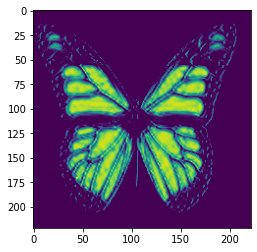

In [74]:
x = output[0]
y = x[:,:,0]
print(y.shape)
plt.imshow(y)

In [38]:
len(output[0][0][0])

64